<a href="https://colab.research.google.com/github/vedakshay/Stock-Market-Prediction/blob/main/Arima_model_Stock_Market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loding Data

In [ ]:
!pip install pmdarima
!pip install pandas==0.23.4

     |████████████████████████████████| 1.5MB 7.7MB/s 
     |████████████████████████████████| 9.5MB 32.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


     |████████████████████████████████| 8.8MB 6.6MB/s 
ERROR: xarray 0.18.2 has requirement pandas>=1.0, but you'll have pandas 0.23.4 which is incompatible.
ERROR: pymc3 3.11.2 has requirement pandas>=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
ERROR: plotnine 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.23.4 which is incompatible.
ERROR: mizani 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.23.4 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 0.23.4 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [ ]:
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%matplotlib inline
from google.colab import drive

In [ ]:
drive.mount('/content/grive', force_remount=True)

Mounted at /content/grive


In [ ]:
import pandas as pd
mydata_df = pd.read_csv('/content/grive/MyDrive/CPU_new.csv',delimiter=',', names=['start time', 'end time', 'job ID', 'task index', 'machine ID', 'mean_CPU_rate','canonical memory usage','assigned memory usage','unmapped page cache','total page cache','maximum memory usage','disk I/O time','local disk space usage','maximum CPU rate','maximum disk IO time','cycles per instruction','memory accesses per instruction','sample portion','aggregation type','sampled CPU usage'])
mydata_df.head()

FileNotFoundError: ignored

In [ ]:
mydata_df.shape

(1048575, 20)

In [ ]:
def seconds_to_mins(x):
    epoch = datetime(2011, 1, 1, tzinfo=timezone.utc)
    cookie_microseconds_since_epoch = x
    cookie_datetime = epoch + timedelta(microseconds=cookie_microseconds_since_epoch)
    return cookie_datetime.minute + cookie_datetime.day * 1440

In [ ]:
#cpu_df['Start time'] =  pd.to_datetime(cpu_df['Start time'])
from datetime import datetime, timezone, timedelta
mydata_df['start time'] = mydata_df['start time'].apply(lambda x: seconds_to_mins(x))

In [ ]:
mydata_df.head()

,start time,end time,job ID,task index,machine ID,mean_CPU_rate,canonical memory usage,assigned memory usage,unmapped page cache,total page cache,maximum memory usage,disk I/O time,local disk space usage,maximum CPU rate,maximum disk IO time,cycles per instruction,memory accesses per instruction,sample portion,aggregation type,sampled CPU usage
0,41786,2.500000e+12,4665712499,1109,3660609678,0.021880,0.06213,0.07727,0.001272,0.001921,0.06287,NaN,3.767000e-04,0.11620,NaN,1.853,0.003527,0,0,0.054810
1,41786,2.500000e+12,4665712499,1201,4802842149,0.019500,0.06299,0.07751,0.002346,0.002995,0.06372,NaN,3.757000e-04,0.12700,NaN,2.588,0.000000,0,0,0.009811
2,41786,2.500000e+12,4665903885,645,288775363,0.012950,0.03082,0.03925,0.004486,0.005135,0.03210,NaN,3.681000e-04,0.06641,NaN,5.292,0.015220,0,0,0.008636
3,41786,2.500000e+12,6377856525,46,904514,0.006134,0.01491,0.01553,0.000043,0.000049,0.01498,NaN,2.860000e-06,0.06238,NaN,3.528,0.009987,0,0,0.000051
4,41786,2.500000e+12,6428210205,15,317477875,0.110500,0.03906,0.07190,0.000073,0.000178,0.03931,NaN,9.540000e-07,0.40920,NaN,4.942,0.011510,0,0,0.135700


In [ ]:
mydata_df1 = mydata_df.groupby(['start time']).mean()
mydata_df1 = mydata_df1.reset_index()

In [ ]:
mydata_df1.head()

,start time,end time,job ID,task index,machine ID,mean_CPU_rate,canonical memory usage,assigned memory usage,unmapped page cache,total page cache,maximum memory usage,disk I/O time,local disk space usage,maximum CPU rate,maximum disk IO time,cycles per instruction,memory accesses per instruction,sample portion,aggregation type,sampled CPU usage
0,41786,2.500000e+12,5.546019e+09,644.122844,1.314492e+09,0.02039,0.024121,0.029967,0.002754,0.007895,0.024873,NaN,0.000112,0.084653,NaN,4.525848,0.015555,0.0,0.36517,0.012038


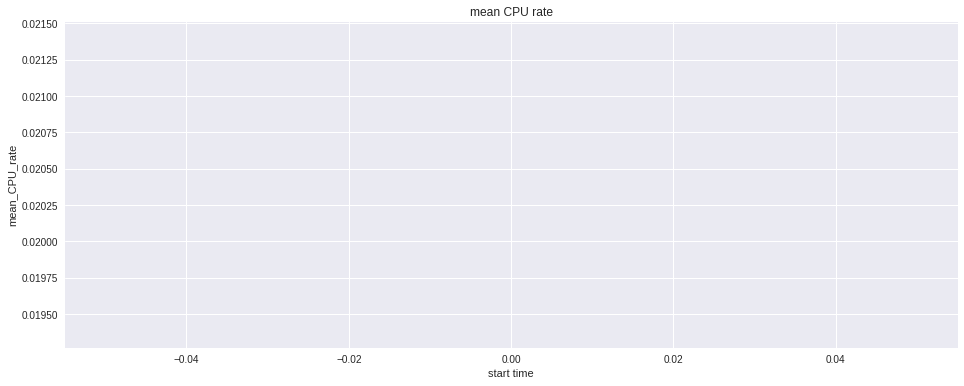

In [ ]:
#plot close price
plt.figure(figsize=(16,6))
plt.grid(True)
plt.xlabel('start time')
#plt.plot(mydata_df['start time'])
plt.ylabel('mean_CPU_rate')
plt.plot(mydata_df['mean_CPU_rate'])
plt.title('mean CPU rate')
plt.show()

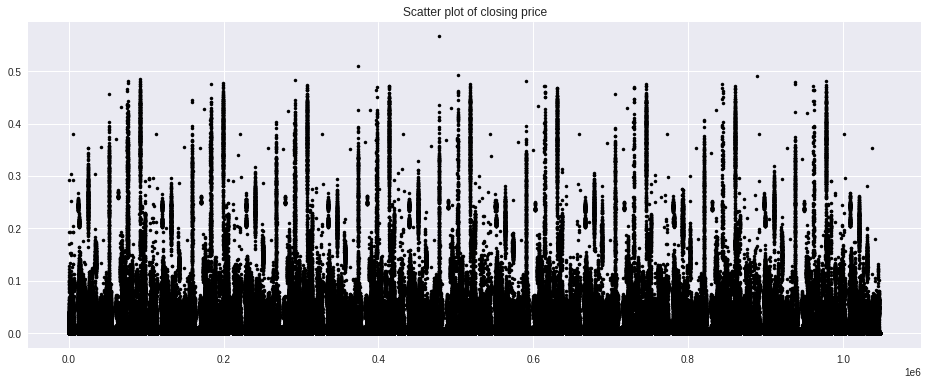

In [ ]:
plt.figure(figsize=(16,6))
df_close = mydata_df['mean_CPU_rate']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

#Test for stationarity

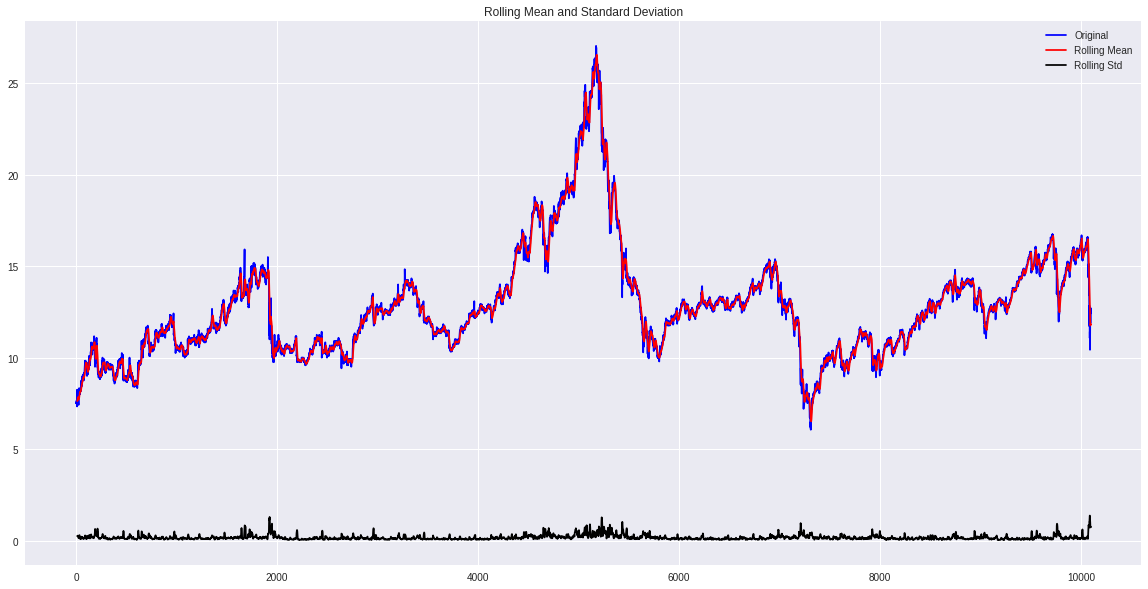

In [ ]:
#Determing rolling statistics
plt.figure(figsize=(20,10))
rolmean = df_close.rolling(window = 12).mean()
rolstd = df_close.rolling(window = 12).std()
#Plot rolling statistics:
plt.plot(df_close, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

#Augumented Dickey Fukker Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(mydata_df.Close)
print(f"ADX Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADX Statistic: -2.6291810134191214
p-value: 0.08711486650728822


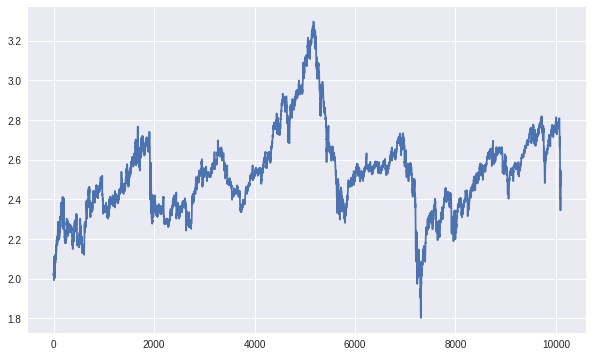

In [ ]:
dff_log = np.log(mydata_df.Close)
plt.plot(dff_log)

In [ ]:
def get_stationary(timeseries):
  rolling_mean = timeseries.rolling(window = 12).mean()
  rolling_std = timeseries.rolling(window = 12).std()

  #rolling statistics plot
  original = plt.plot(timeseries, color = 'blue', label = 'Original')
  mean = plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
  std = plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
  plt.legend(loc = 'best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block = False)

  #Dicker-Fuller test:
  result = adfuller(timeseries)
  print('ADF Statistics: {}'.format(result[0]))
  print('p-value: {}'.format(result[1]))
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

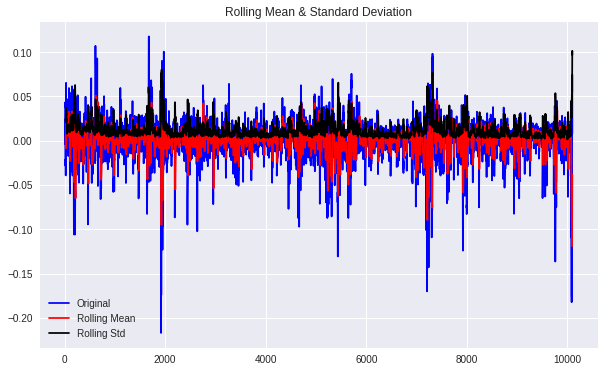

ADF Statistics: -19.42324854809159
p-value: 0.0
Critical Values:
	1%: -3.4309997435394877
	5%: -2.861827148204747
	10%: -2.5669228438492597


In [ ]:
rolling_mean = dff_log.rolling(window=12).mean()
dff_log_minus_mean = dff_log - rolling_mean
dff_log_minus_mean.dropna(inplace = True)
get_stationary(dff_log_minus_mean)

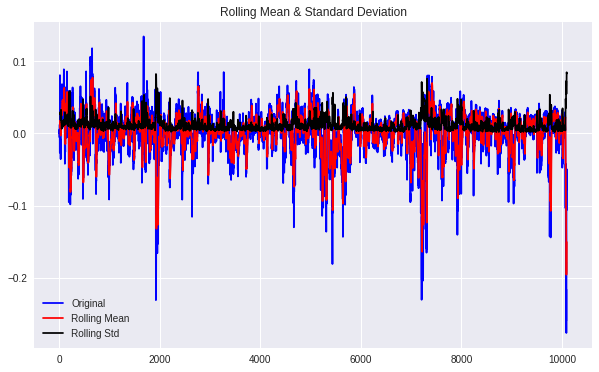

ADF Statistics: -13.158166017665295
p-value: 1.3240657865313182e-24
Critical Values:
	1%: -3.4309990341724883
	5%: -2.861826834740749
	10%: -2.5669226769920557


In [ ]:
rolling_mean_exp_decay = dff_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
dff_log_exp_decay = dff_log - rolling_mean_exp_decay
dff_log_exp_decay.dropna(inplace = True)
get_stationary(dff_log_exp_decay)

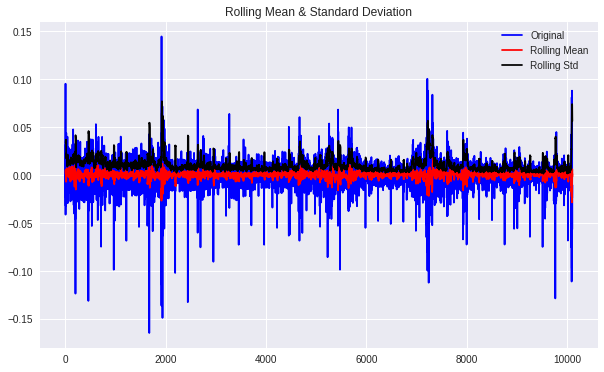

ADF Statistics: -22.54912101789167
p-value: 0.0
Critical Values:
	1%: -3.430999163033074
	5%: -2.8618268916832887
	10%: -2.566922707302626


In [ ]:
dff_log_shift = dff_log - dff_log.shift()
dff_log_shift.dropna(inplace = True)
get_stationary(dff_log_shift)

<Figure size 720x432 with 0 Axes>

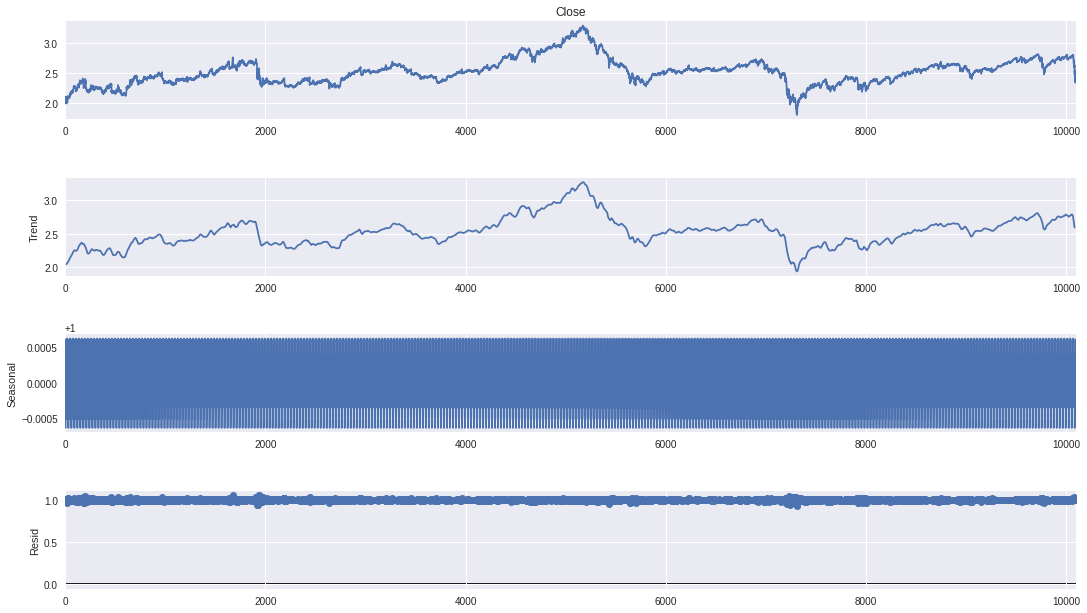

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dff_log, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


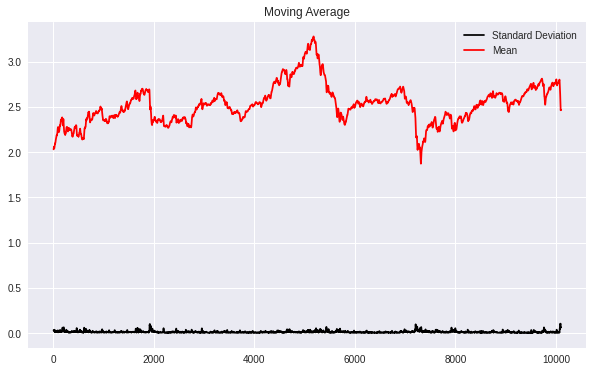

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(mydata_df.Close)
moving_avg = df_log.rolling(window =12).mean()
std_dev = df_log.rolling(window = 12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

<Figure size 720x432 with 0 Axes>

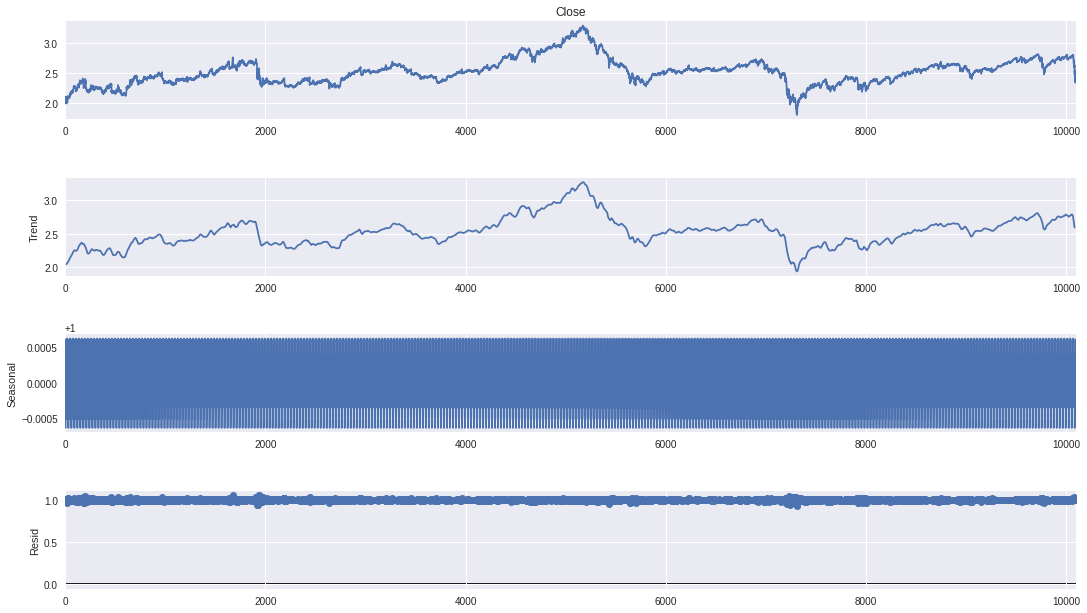

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_log, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

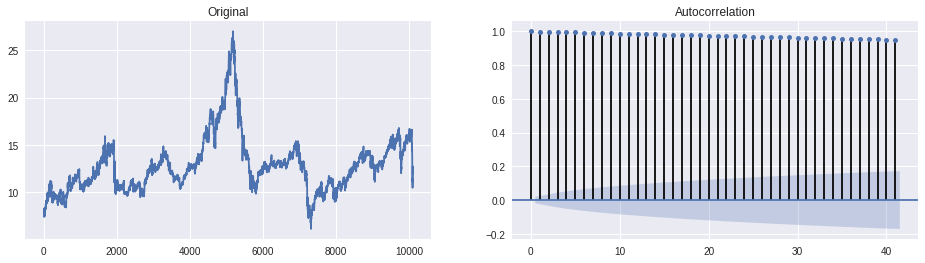

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
ax1.plot(mydata_df.Close)
ax1.set_title("Original")
plot_acf(mydata_df.Close,ax = ax2);

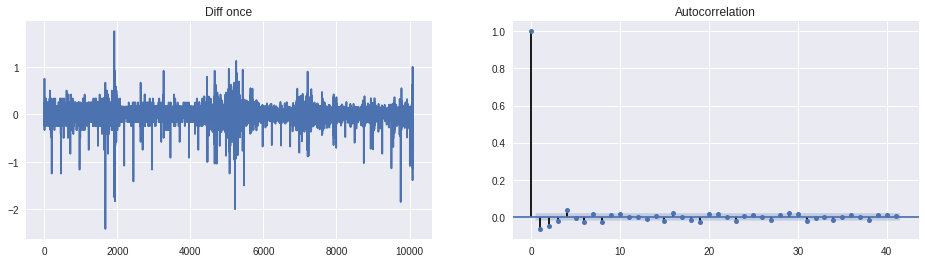

In [ ]:
diff = mydata_df.Close.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
ax1.plot(diff)
ax1.set_title("Diff once")
plot_acf(diff,ax = ax2);

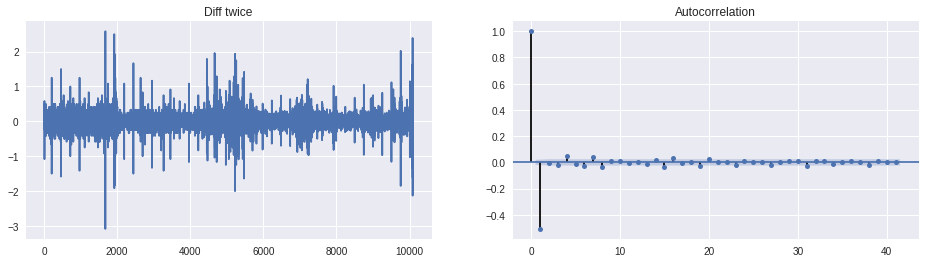

In [ ]:
diff = mydata_df.Close.diff().diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
ax1.plot(diff)
ax1.set_title("Diff twice")
plot_acf(diff,ax = ax2);

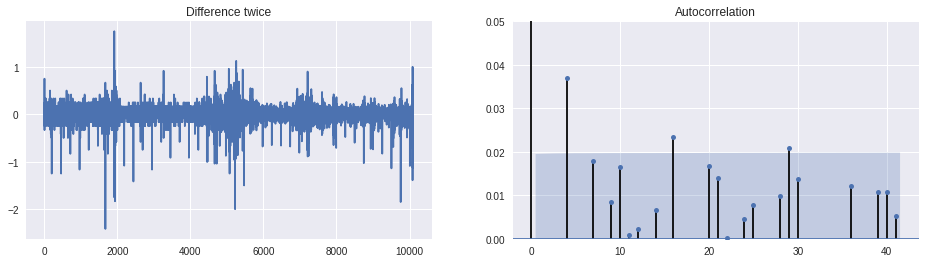

In [ ]:
diff = mydata_df.Close.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))

ax1.plot(diff)
ax1.set_title("Difference twice")
ax2.set_ylim(0, 0.05)
plot_acf(diff, ax = ax2);

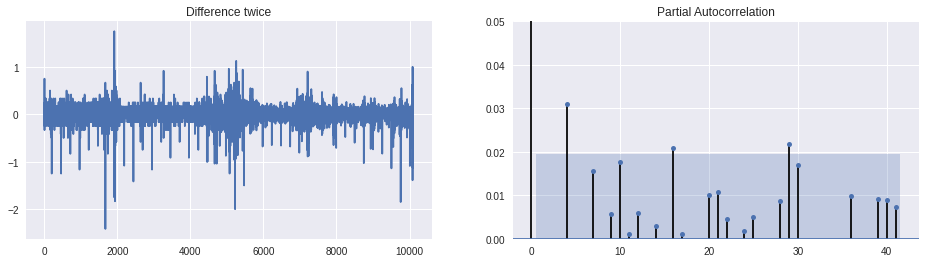

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
diff = mydata_df.Close.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))

ax1.plot(diff)
ax1.set_title("Difference twice")
ax2.set_ylim(0, 0.05)
plot_pacf(diff, ax = ax2);

#Auto arima

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(mydata_df['Close'], trace= True, suppress_warnings= True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7968.739, Time=19.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7897.357, Time=1.48 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7937.712, Time=0.83 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7942.662, Time=2.75 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7899.285, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7965.753, Time=11.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7966.500, Time=10.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-7985.182, Time=19.80 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-7975.208, Time=14.11 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-7986.574, Time=28.79 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-7977.608, Time=14.85 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-7971.746, Time=32.73 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-7982.392, Time=31.44 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-7985.944, Time=20.27 sec
 ARIMA(5,

In [ ]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10098
Model:               SARIMAX(4, 1, 2)   Log Likelihood                4001.247
Date:                Sat, 26 Jun 2021   AIC                          -7988.495
Time:                        06:14:47   BIC                          -7937.955
Sample:                             0   HQIC                         -7971.395
                              - 10098                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0402      0.112     -9.259      0.000      -1.260      -0.820
ar.L2         -0.7597      0.074    -10.291      0.000      -0.904      -0.615
ar.L3         -0.1302      0.013    -10.410      0.000      -0.155      -0.106
ar.L4         -0.0357      0.011     -3.163      0.002      -0.058      -0.014
ma.L1          0.9719      0.113      8.623      0.000       0.751       1.193
ma.L2          0.6403      0.069      9.340      0.000       0.506       0.775
sigma2         0.0265      0.000    229.646      0.000       0.026       0.027
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            187662.84
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -1.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tools.data import _is_using_pandas
from pmdarima.arima.utils import ndiffs

In [ ]:
ndiffs(mydata_df.Close, test="adf")

1

#Split data to train and test

In [ ]:
n = int(len(mydata_df)*0.85)
train = df_log[:n]
test = df_log[n:]
plt.figure(figsize=(20,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train, 'green', label='Train data')
plt.plot(test, 'blue', label='Test data')
plt.legend()

NameError: ignored

In [ ]:
train.head()

0    2.014903
1    2.025953
2    2.025953
3    2.014903
4    2.025953
Name: Close, dtype: float64

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model_org = ARIMA(mydata_df['Close'],order = (4,1,2))
model_org = model_org.fit(disp = 0)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train,order = (4,1,2))
model = model.fit(disp = 0)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 8582
Model:                 ARIMA(4, 1, 2)   Log Likelihood               25041.876
Method:                       css-mle   S.D. of innovations              0.013
Date:                Sat, 26 Jun 2021   AIC                         -50067.752
Time:                        20:42:58   BIC                         -50011.292
Sample:                             1   HQIC                        -50048.494
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.277e-05      0.000      0.558      0.577      -0.000       0.000
ar.L1.D.Close    -0.0719      0.137     -0.524      0.600      -0.341       0.197
ar.L2.D.Close     0.6991      0.120      5.846      0.000       0.465       0.933
ar.L3.D.Close     0.0408      0.024      1.676      0.094      -0.007       0.088
ar.L4.D.Close     0.0725      0.018      4.001      0.000       0.037       0.108
ma.L1.D.Close    -0.0198      0.137     -0.145      0.885      -0.288       0.248
ma.L2.D.Close    -0.7733      0.110     -7.025      0.000      -0.989      -0.558
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1355           -0.0000j            1.1355           -0.0000
AR.2           -1.1124           -0.0000j            1.1124           -0.5000
AR.3           -0.2926           -3.2911j            3.3041           -0.2641
AR.4           -0.2926           +3.2911j            3.3041            0.2641
MA.1            1.1244           +0.0000j            1.1244            0.0000
MA.2           -1.1501           +0.0000j            1.1501            0.5000
-----------------------------------------------------------------------------
"""

#Plot Residual errors

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_org.resid)
fig, ax = plt.subplots(1,2,figsize = (16,4))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

NameError: ignored

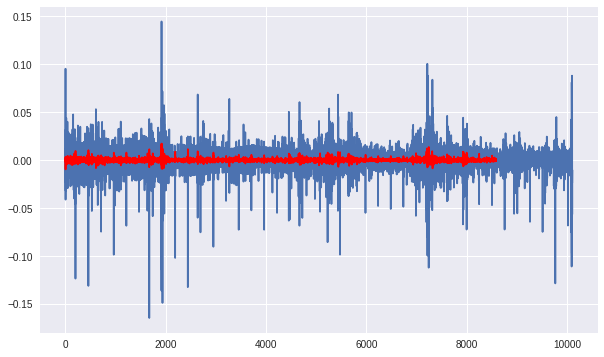

In [ ]:
plt.plot(dff_log_shift)
plt.plot(model.fittedvalues, color = 'red')

#Actual vs Predicted

<Figure size 1440x720 with 0 Axes>

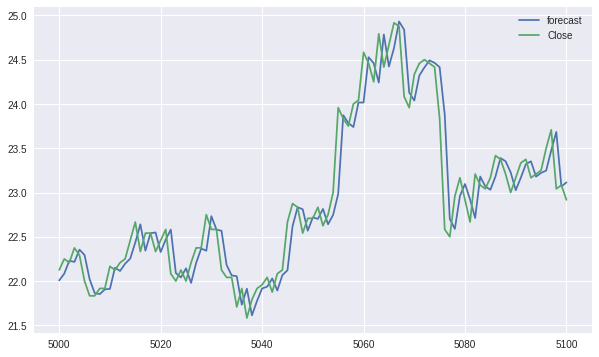

In [ ]:
# Actual vs Fitted
plt.figure(figsize = (20,10))
model_org.plot_predict(start = 5000, end = 5100, dynamic=False)
plt.show()

#Cross-Validation

In [ ]:
step = len(test)
fc,se,conf = model.forecast(step, alpha=0.05)

In [ ]:
step = len(test)
fc,se,conf = model.forecast(step, alpha=0.05)

In [ ]:
fc = pd.Series(fc,index=test[:step].index)
lower = pd.Series(conf[:,0],index = test[:step].index)
upper = pd.Series(conf[:,1],index = test[:step].index)

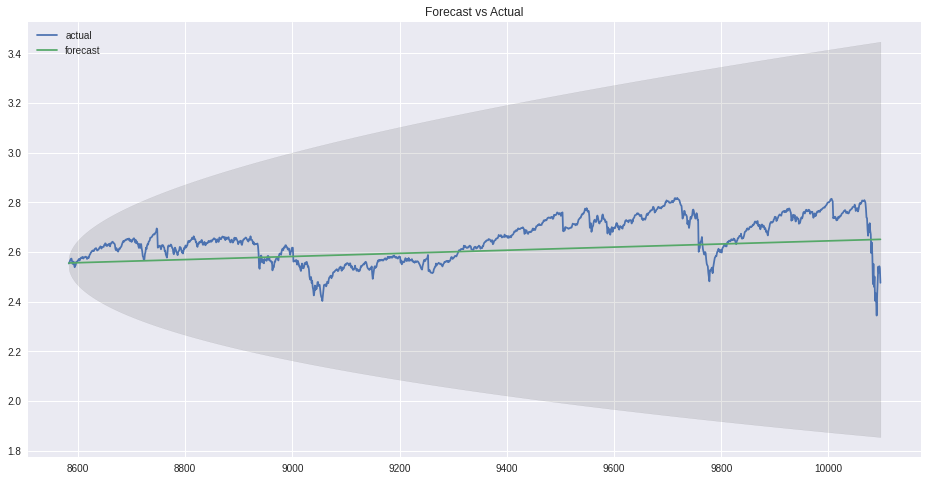

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(test[:step],label = "actual")
plt.plot(fc,label = "forecast")
plt.fill_between(lower.index,lower,upper,color = "k",alpha = 0.1)
plt.title("Forecast vs Actual")
plt.legend(loc = "upper left")

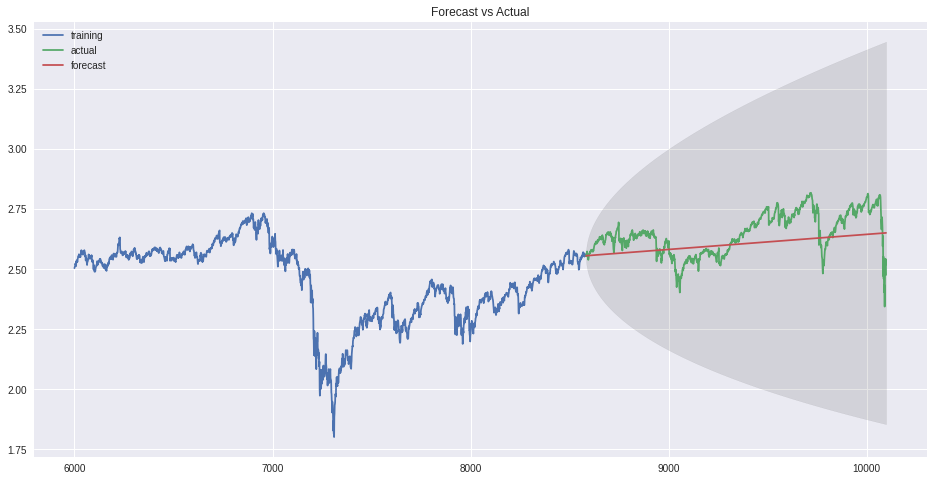

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(train[6000:],label = "training")
plt.plot(test[:step],label = "actual")
plt.plot(fc,label = "forecast")
plt.fill_between(lower.index,lower,upper,color = "k",alpha = 0.1)
plt.title("Forecast vs Actual")
plt.legend(loc = "upper left",fontsize = 10)
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# report performance
mse = mean_squared_error(test, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test)/np.abs(test))
print('MAPE: '+str(mape))


MSE: 0.007385745655514935
MAE: 0.07345774456132069
RMSE: 0.08594036103900736
MAPE: 0.027465701902415183
